## Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

## Loading the dataset

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data cleaning and preprocessing

In [3]:
# Dropping useless columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)
# Renaming seful columns
df.columns = ['Class', 'Text']

In [4]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

<AxesSubplot:xlabel='Class', ylabel='count'>

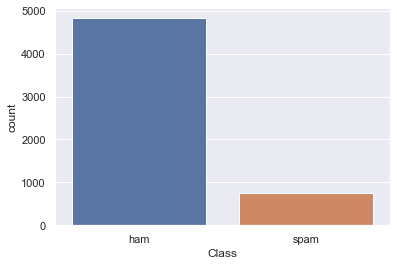

In [6]:
sns.countplot(x='Class', data=df)

## Feature Extraction and Feature Selection

In [7]:
df['Class'] = df['Class'].map({
    'ham': 0,
    'spam': 1
})

In [8]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Creating dependent and independent variables

In [9]:
y = df.Class.values
X = df.Text.values

### Creating out train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

### Converting text to vectors

In [11]:
count_vec = CountVectorizer()

In [12]:
X_train_vec = count_vec.fit_transform(X_train)
X_test_vec = count_vec.transform(X_test)

In [13]:
X_test_vec

<1393x7336 sparse matrix of type '<class 'numpy.int64'>'
	with 17002 stored elements in Compressed Sparse Row format>

### Checking for class imbalance

<AxesSubplot:ylabel='count'>

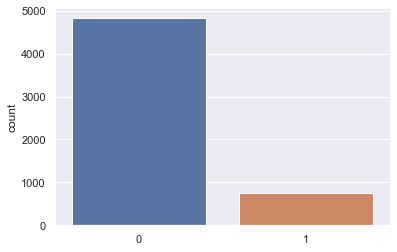

In [14]:
sns.countplot(x=y)

## Classification

In [15]:
model = MultinomialNB()

In [16]:
model.fit(X_train_vec.toarray(), y_train)

MultinomialNB()

### Checking the performance of the model

In [28]:
# Checking the score of the model on the train dataset
train_score = model.score(X_train_vec.toarray(), y_train)
print(f"This model has a {round(train_score * 100, 2)}% accuracy on the training dataset")

This model has a 99.33% accuracy on the training dataset


In [30]:
# Checking the score of the model on the test set
test_score = model.score(X_test_vec.toarray(), y_test)
print(f"This model has a {round(test_score * 100, 2)}% accuracy on the testing dataset")

This model has a 99.14% accuracy on the testing dataset


In [19]:
# Making the prediction with the test set
pred = model.predict(X=X_test_vec.toarray())
cm = confusion_matrix(y_pred=pred, y_true=y_test)

In [20]:
# Plotting the confusion matrix

def plot_cm(cm):
    cm_df = pd.DataFrame(cm)
    sns.heatmap(cm_df, annot=True, fmt='g')
    plt.yticks([0, 1], ['predicted ham', 'predicted spam'], rotation = 45)
    plt.xticks([0, 1], ['actual ham', 'actual spam'], rotation = 45)
    plt.show()


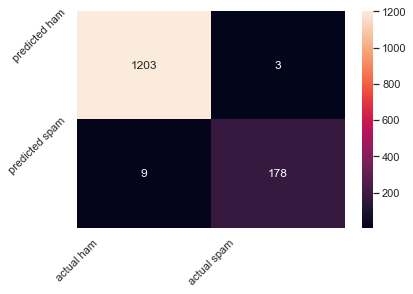

In [21]:
plot_cm(cm)

In [22]:
F1 = f1_score(y_pred=pred, y_true=y_test)
print(f"Test F1 score: {F1}")

Test F1 score: 0.967391304347826


In [23]:
test_auc = roc_auc_score(y_test, pred, multi_class='ovo', average='weighted')
print(f"Test AUC: {test_auc}")

Test AUC: 0.9746920477824779


In [24]:
# Visualize the text data in spam and ham
from wordcloud import WordCloud, STOPWORDS


# Creating our text visualization function
def visualize(label):
    if label == 'ham':
        label = 0
    else:
        label = 1
    words = []
    for word in df[df['Class'] == label]['Text']:
        words.append(word.lower())
        
    new_words = ' '.join(words)
    wordcloud = WordCloud(width=600, height=400).generate(new_words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


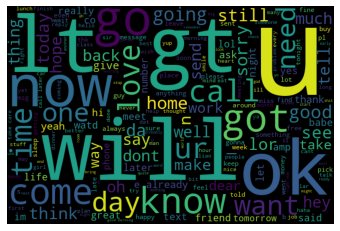

In [25]:
visualize('ham')

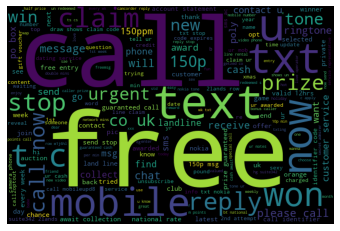

In [26]:
visualize('spam')